# Tarea 1: Explorando datos mundiales de COVID-19 

En esta actividad se pide que explore los datos del repositorio ["COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University"](https://github.com/CSSEGISandData/COVID-19)

Adjunto a este cuadernillo encontrará los datos al 26 de Abril de 2021 de dicho repositorio en el archivo `data.zip`. Luego de descomprimir debería observar cuatro archivos

- `covid19_confirmados.csv` : Número de casos diarios acumulado reportados como COVID-19 positivos (confirmados)
- `covid19_recuperados.csv` : Número de casos diarios acumulado reportados como recuperados 
- `covid19_decesos.csv` : Número de decesos diarios por COVID-19 acumulado 
- `population_by_country_2020.csv`:  Población por país más otros indicadores socioeconómicos al 2020 descargados desde: https://www.kaggle.com/tanuprabhu/population-by-country-2020

En los primeros tres archivos cada fila corresponde a un país o un estado/provincia de un país. Las columnas son las coordenadas geográficas (latitud y longitud) y el número de casos diarios para cada día desde Enero de 2020 a la fecha. Según quienes compilaron este repositorio, la información de casos recuperados debe analizarse con cautela pues podría estar considerablemente subestimada. 

A modo de ejemplo se muestra a continuación una gráfica de la series de tiempo del número de casos confirmados totales acumulados de Chile, Argentina y Bolivia 

<img src="ejemplo1.png">

A partir de esta información se puede calcular la serie de tiempo de los casos confirmados "nuevos" por día

<img src="ejemplo2.png">

En esta tarea se pide que procese, visualice, analice y discuta en base a estos datos. Escriba las rutinas de Python necesarias para resolver las actividades específicas que encontrará en este enunciado. **Use las librerías vistas en el curso**. Discuta con sus compañeros de grupo y complete con su análisis donde corresponda.

## Instrucciones generales 

1. Forme un grupo de **máximo tres estudiantes**
1. Versione su trabajo usando un **repositorio privado de github**. Agregue a sus compañeros y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas de programación si no se cumple este requisito
1. Su tarea se evaluará en base al último commit antes de la fecha de entrega: **14:10 del 10 de Mayo de 2021**. La nota se calcula como ("pt totales" + 1)
1. [Sean leales y honestos](https://www.acm.org/about-acm/code-of-ethics-in-spanish), no copie ni comparta resultados con otros grupos

## Enunciado

### Preparación de datos (1.5pt)

1. Explore el archivo `covid19_confirmados.csv` y configure la función `read_csv` de pandas para importarlo como un `DataFrame`. 
    1. Utilice el nombre de país como índice principal
    1. Elimine las columnas `Lat` y `Long`
    1. Use TimeStamps para los "nombres de columna" asociados a fechas
    1. Reduzca la columna `Province/State`, el DataFrame resultante debe tener los totales a nivel país
1. Explore el archivo `mundiales.csv` y configure la función `read_csv` de pandas para importarlo como un `DataFrame`. 
    1. Utilice el nombre de país como índice principal. Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, modifíquelos manualmente o usando pandas. 
1. Haga un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final
1. Repita el procedimiento anterior para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv` 

### Análisis global (1.5pt)

1. Obtenga la cantidad total mundial a la fecha (26 de Abril) de los casos (a) confirmados, (b) cerrados (recuperados más decesos) y (c) activos (confirmados menos cerrados) por país. En base a estas cantidades calcule el porcentaje de 
    1. casos activos con respecto al total de confirmados
    1. decesos con respecto al total de casos cerrados
    1. recuperados con respecto al total de casos cerrados
1. Luego calcule las siguientes tasas en base a información a la fecha
    1. Tasa de incidencia: confirmados por 100.000 dividido población total
    1. Tasa de recuperación: recuperados por 100.000 dividido población total
    1. Tasa de mortalidad: decesos por 100.000 dividido población total
1. En base a lo anterior muestre los nombres y los valores de los 5 países con
    1. La mayor y menor tasa de incidencia, respectivamente
    1. La mayor y menor tasa de recuperación, respectivamente
    1. La mayor y menor tasa de mortalidad, respectivamente
1. Responda, analice y discuta: ¿En qué lugar/ranking se encuentra Chile con respecto a cada una de las métricas de los puntos anteriores? ¿A qué países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? ¿A qué paises de latinoamérica se parece más? 

### Análisis temporal y comparativo (2.0pt)

1. Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). Requerimientos:
    1. La interfaz debe incluir controles para escoger dos países a partir de una lista
    1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
    1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos  
    1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes)
    1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales (acumulados). Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)
    
En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. En particular destaque patrones y comportamientos que considere relevantes y compare lo que observa en las distintas series de tiempo. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.


### Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). Entregue el link de su dashboard web

# Desarrollo

## Preparación de Datos

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates

### covid19_confirmados.csv

Creamos el DataFrame, hacemos index la columna 'Country/Region' y usamos TimeStamp para las columnas que son fechas

In [2]:
covid19_confirmados = pd.read_csv("data/covid19_confirmados.csv",index_col='Country/Region', parse_dates=True, infer_datetime_format=True)

Eliminando Lat y Long

In [3]:
covid19_confirmados.drop(labels = ["Lat","Long"], axis=1, inplace =True)

Agrupando por ciudad

In [69]:
covid19_confirmados = covid19_confirmados.groupby(by=covid19_confirmados.index)[covid19_confirmados.columns].sum()
covid19_confirmados[3:4:15]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Andorra,0,0,0,0,0,0,0,0,0,0,...,12712,12771,12805,12805,12874,12917,12942,13007,13024,13060


## population_by_country_2020.csv

In [5]:
 mundiales = pd.read_csv("data/population_by_country_2020.csv", index_col = 'Country (or dependency)')

In [6]:
mundiales.drop(mundiales.columns[[1,2,3,4,5,6,7,8,9]], axis='columns', inplace=True)
mundiales.head()

,Population (2020)
Country (or dependency),
China,1440297825
India,1382345085
United States,331341050
Indonesia,274021604
Pakistan,221612785


In [81]:
confirmados_mundial = pd.merge(covid19_confirmados, mundiales, how = 'inner', left_index = True, right_index = True)
confirmados_mundial.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,Population (2020)
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,57721,57793,57898,58037,58214,58312,58542,58730,58843,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,129456,129594,129694,129842,129980,130114,130270,130409,130537,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,119486,119642,119805,119992,120174,120363,120562,120736,120922,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,12771,12805,12805,12874,12917,12942,13007,13024,13060,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,24300,24389,24518,24661,24883,25051,25279,25492,25609,33032075
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,1216,1216,1217,1217,1217,1217,1222,1227,1227,98069
Argentina,0,0,0,0,0,0,0,0,0,0,...,2677747,2694014,2714475,2743620,2769552,2796768,2824652,2845872,2860884,45267449
Armenia,0,0,0,0,0,0,0,0,0,0,...,207973,208520,208818,209485,210518,211399,212114,212878,213288,2964219
Australia,0,0,0,0,4,5,5,6,9,9,...,29519,29533,29556,29576,29594,29638,29653,29663,29680,25550683
Austria,0,0,0,0,0,0,0,0,0,0,...,591347,593423,595540,597566,600089,602494,604823,606954,608979,9015361


In [8]:
nan_values = confirmados_mundial[confirmados_mundial.isna().any(axis=1)]
nan_values

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,Population (2020)


Al realizar un inner join no existen filas con valores NaN

### covid19_recuperados.csv

In [9]:
covid19_recuperados = pd.read_csv("data/covid19_recuperados.csv",index_col='Country/Region', parse_dates=True, infer_datetime_format=True)

In [10]:
covid19_recuperados.drop(labels = ["Lat","Long"], axis=1, inplace =True)

In [11]:
covid19_recuperados = covid19_recuperados.groupby(by=covid19_recuperados.index)[covid19_recuperados.columns].sum()
covid19_recuperados.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,52105,52116,52168,52244,52272,52301,52348,52363,52392,52489
Albania,0,0,0,0,0,0,0,0,0,0,...,100600,101142,101584,102171,102601,103066,103582,104278,105016,105728
Algeria,0,0,0,0,0,0,0,0,0,0,...,83169,83286,83397,83514,83636,83765,83900,84038,84167,84299
Andorra,0,0,0,0,0,0,0,0,0,0,...,12105,12159,12203,12203,12285,12334,12375,12423,12458,12491
Angola,0,0,0,0,0,0,0,0,0,0,...,22203,22576,22597,22600,22647,22882,22901,23089,23092,23092


In [12]:
recuperados_mundial = pd.merge(covid19_recuperados, mundiales, how = 'inner', left_index = True, right_index = True)
recuperados_mundial.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,Population (2020)
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,52116,52168,52244,52272,52301,52348,52363,52392,52489,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,101142,101584,102171,102601,103066,103582,104278,105016,105728,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,83286,83397,83514,83636,83765,83900,84038,84167,84299,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,12159,12203,12203,12285,12334,12375,12423,12458,12491,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,22576,22597,22600,22647,22882,22901,23089,23092,23092,33032075
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,986,986,995,995,995,995,995,1002,1002,98069
Argentina,0,0,0,0,0,0,0,0,0,0,...,2343808,2364171,2386383,2407853,2424675,2449793,2474514,2496277,2518167,45267449
Armenia,0,0,0,0,0,0,0,0,0,0,...,187256,187466,189017,189688,190271,191158,192281,193360,194080,2964219
Australia,0,0,0,0,0,0,0,0,2,2,...,23158,23160,23173,23177,23181,23183,23191,23195,23209,25550683
Austria,0,0,0,0,0,0,0,0,0,0,...,552619,555218,557467,560492,563256,565513,568213,570684,573155,9015361


In [13]:
nan_values = recuperados_mundial[recuperados_mundial.isna().any(axis=1)]
nan_values

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,Population (2020)


### covid19_decesos.csv

In [14]:
covid19_decesos = pd.read_csv("data/covid19_decesos.csv",index_col='Country/Region', parse_dates=True, infer_datetime_format=True)

In [15]:
covid19_decesos.drop(labels = ["Lat","Long"], axis=1, inplace =True)

In [16]:
covid19_decesos = covid19_decesos.groupby(by=covid19_decesos.index)[covid19_decesos.columns].sum()
covid19_decesos.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2535,2539,2539,2546,2549,2557,2561,2565,2572,2582
Albania,0,0,0,0,0,0,0,0,0,0,...,2337,2340,2342,2347,2353,2358,2364,2367,2372,2378
Algeria,0,0,0,0,0,0,0,0,0,0,...,3148,3152,3155,3160,3165,3172,3181,3190,3198,3207
Andorra,0,0,0,0,0,0,0,0,0,0,...,123,123,123,123,123,123,123,123,124,124
Angola,0,0,0,0,0,0,0,0,0,0,...,560,561,561,563,565,570,572,574,577,579


In [17]:
decesos_mundial = pd.merge(covid19_decesos, mundiales, how = 'inner', left_index = True, right_index = True)
decesos_mundial.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,Population (2020)
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,2539,2539,2546,2549,2557,2561,2565,2572,2582,39074280
Albania,0,0,0,0,0,0,0,0,0,0,...,2340,2342,2347,2353,2358,2364,2367,2372,2378,2877239
Algeria,0,0,0,0,0,0,0,0,0,0,...,3152,3155,3160,3165,3172,3181,3190,3198,3207,43984569
Andorra,0,0,0,0,0,0,0,0,0,0,...,123,123,123,123,123,123,123,124,124,77287
Angola,0,0,0,0,0,0,0,0,0,0,...,561,561,563,565,570,572,574,577,579,33032075
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,98069
Argentina,0,0,0,0,0,0,0,0,0,0,...,59164,59228,59476,59792,60083,60620,61176,61474,61644,45267449
Armenia,0,0,0,0,0,0,0,0,0,0,...,3859,3878,3895,3919,3944,3969,3984,4001,4018,2964219
Australia,0,0,0,0,0,0,0,0,0,0,...,910,910,910,910,910,910,910,910,910,25550683
Austria,0,0,0,0,0,0,0,0,0,0,...,9870,9898,9922,9959,9997,10026,10055,10070,10087,9015361


In [18]:
nan_values = decesos_mundial[decesos_mundial.isna().any(axis=1)]
nan_values

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,Population (2020)


## Análisis Global

### Total de Casos a la Fecha a Nivel Mundial

#### Casos Confirmados

In [19]:
total_confirmados = confirmados_mundial['4/25/21'].sum()
total_confirmados

114443232

#### Casos Recuperados

In [20]:
total_recuperados = recuperados_mundial['4/25/21'].sum()
total_recuperados

84273552

#### Decesos

In [21]:
total_decesos = decesos_mundial['4/25/21'].sum()
total_decesos

2526552

### Porcentajes a Nivel Mundial

#### Casos activos respecto al total de confirmados

In [22]:
activos = (total_confirmados - total_recuperados) - total_decesos
poblacion = mundiales['Population (2020)'].sum()

porcentaje_activos = (activos*100)/total_confirmados
porcentaje_activos

24.154445410978955

El porcentaje de casos activos respecto al total de casos confirmados es de 24.15%

#### Decesos respecto al total de casos cerrados

In [23]:
cerrados = total_recuperados + total_decesos

porcentaje_decesos = (total_decesos/cerrados)*100
porcentaje_decesos

2.910770705989016

El porcentaje de decesos a nivel mundial respecto al total de casos cerrados es de un 2.91%

#### Recuperados respecto al total de casos cerrados

In [24]:
porcentaje_recuperados = (total_recuperados/cerrados)*100
porcentaje_recuperados

97.08922929401098

El porcentaje de casos recuperados respecto a los casos cerrados a nivel mundial es de 97.09%

### Tasas de Incidencia, Recuperación y Mortalidad

#### Incidencia

In [25]:
t_incidencia = (total_confirmados * 100000)/poblacion
t_incidencia

1465.63326531977

La tasa de incidencia es de 1466 personas contagiadas por cada 100000 personas.

#### Recuperación

In [26]:
t_recuperacion = (total_recuperados * 100000)/poblacion
t_recuperacion

1079.2610365797382

Por cada 100000 personas existen 1079 que se han recuperado del Covid19.

#### Mortalidad

In [27]:
t_mortalidad = (total_decesos * 100000)/poblacion
t_mortalidad

32.35664174321987

32 de cada 100000 personas mueren debido al Covid19 a nivel mundial.

### Top 5

In [28]:
df_incidencia = confirmados_mundial['4/25/21'].mul(100000).div(confirmados_mundial['Population (2020)']).sort_values(0)
df_recuperacion = recuperados_mundial['4/25/21'].mul(100000).div(recuperados_mundial['Population (2020)']).sort_values(0)
df_mortalidad = decesos_mundial['4/25/21'].mul(100000).div(decesos_mundial['Population (2020)']).sort_values(0)

**Mayor tasa de incidencia**

In [29]:
df_incidencia.tail()

Slovenia      11401.118524
San Marino    14868.607118
Czechia       15116.787605
Montenegro    15389.759266
Andorra       16898.055300
dtype: float64

**Menor tasa de incidencia**

In [30]:
df_incidencia.head()

Tanzania           0.848158
Micronesia         0.867822
Vanuatu            1.297282
Samoa              1.510247
Solomon Islands    2.899933
dtype: float64

**Mayor tasa de recuperación**

In [31]:
df_recuperacion.tail()

Slovenia      10695.487085
Czechia       14227.759190
San Marino    14255.833137
Montenegro    14744.777735
Andorra       16161.838343
dtype: float64

**Menor tasa de recuperación**

In [32]:
df_recuperacion.head()

Serbia      0.000000
Belgium     0.000000
Sweden      0.000000
Tanzania    0.304937
Laos        0.671827
dtype: float64

**Mayor tasa de mortalidad**

In [33]:
df_mortalidad.tail()

Montenegro                233.250541
Bosnia and Herzegovina    250.308805
San Marino                262.196559
Czechia                   270.357539
Hungary                   275.735780
dtype: float64

**Menor tasa de mortalidad**

In [34]:
df_mortalidad.head()

Marshall Islands    0.0
Micronesia          0.0
Dominica            0.0
Laos                0.0
Samoa               0.0
dtype: float64

### Discusión

¿En qué lugar/ranking se encuentra Chile con respecto a cada una de las métricas de los puntos anteriores?

Incidencia:
Recuperación:
Mortalidad:

In [35]:
rank = (df_incidencia.index == "Chile")
print(np.where(rank==True)[0][0]+1)

143


In [36]:
rank = (df_recuperacion.index == "Chile")
print(np.where(rank==True)[0][0]+1)

156


In [37]:
rank = (df_mortalidad.index == "Chile")
print(np.where(rank==True)[0][0]+1)

153


### Comparación respecto a países de la OCDE

In [51]:
paises_ocde=['Austria','Australia','Belgium','Canada','Colombia','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','Ireland','Israel','Italy','Japan','Korea','Latvia','Lithuania','Luxembourg','Mexico','Netherlands','New Zealand','Norway','Poland','Portugal','Slovak Republic','Slovenia','Spain','Sweden','Switzerland','Turkey','United Kingdom','United States']

 ¿A qué países de la OCDE se parece más?

In [39]:
df_incidencia_ocde = df_incidencia[df_incidencia.index == "Chile"]
for i in paises_ocde:
    df_incidencia_ocde = df_incidencia_ocde.append(df_incidencia[df_incidencia.index == i]).sort_values(0)
df_incidencia_ocde

New Zealand          53.861849
Australia           116.161278
Japan               449.831973
Finland            1548.183522
Mexico             1802.634203
Iceland            1870.455583
Norway             2037.581002
Canada             3140.237094
Greece             3198.876966
Germany            3944.475319
Denmark            4284.427635
Ireland            4985.237304
Colombia           5442.660276
Turkey             5479.561731
Chile              6108.958634
Latvia             6125.983315
United Kingdom     6505.599362
Italy              6555.721976
Austria            6754.904213
Poland             7290.989212
Spain              7418.235347
Switzerland        7460.624549
Hungary            7969.338803
Portugal           8187.700052
Belgium            8401.277033
France             8513.341643
Netherlands        8670.193303
Lithuania          8886.437794
Estonia            9061.252302
Sweden             9281.121414
Israel             9656.304182
Luxembourg        10515.625199
Slovenia

#### En términos de incidencia se parece más a Turquía y Latvia.

In [40]:
df_recuperacion_ocde = df_recuperacion[df_recuperacion.index == "Chile"]
for i in paises_ocde:
    df_recuperacion_ocde = df_recuperacion_ocde.append(df_recuperacion[df_recuperacion.index == i]).sort_values(0)
df_recuperacion_ocde

Belgium               0.000000
Sweden                0.000000
United Kingdom       21.269118
New Zealand          52.640069
Australia            90.835145
Netherlands         136.072923
Spain               321.604997
Norway              331.540727
Japan               396.695852
Ireland             472.260745
France              517.912009
Finland             829.989768
Greece              900.370427
Mexico             1432.791601
Iceland            1822.742867
Canada             2859.939046
Germany            3480.491673
Switzerland        3665.060126
Denmark            4077.345931
Turkey             4821.151884
Hungary            4993.867533
Colombia           5077.274420
Latvia             5591.455200
Italy              5595.443936
Chile              5745.315717
Austria            6357.537984
Poland             6446.775974
Portugal           7777.972604
Lithuania          8025.182850
Estonia            8087.628411
Israel             9563.650103
Luxembourg         9906.420861
Slovenia

#### En términos de recuperación se parece más a Italia y Austria.

In [41]:
df_mortalidad_ocde = df_mortalidad[df_mortalidad.index == "Chile"]
for i in paises_ocde:
    df_mortalidad_ocde = df_mortalidad_ocde.append(df_mortalidad[df_mortalidad.index == i]).sort_values(0)
df_mortalidad_ocde

New Zealand         0.538411
Australia           3.561549
Japan               7.862671
Iceland             8.488766
Norway             13.557838
Finland            16.293060
Denmark            42.720738
Turkey             45.396638
Canada             63.360782
Israel             73.192229
Estonia            86.154069
Greece             96.092390
Germany            97.423420
Ireland            98.498828
Netherlands       100.813556
Latvia            111.665484
Austria           111.886812
Switzerland       121.976340
Luxembourg        125.855499
Chile             135.056325
Sweden            137.711960
Colombia          139.969109
Lithuania         141.713377
France            157.762156
Spain             165.941728
Mexico            166.411403
Portugal          166.463734
Poland            172.876025
United Kingdom    187.909092
Italy             197.263559
Slovenia          202.406073
Belgium           207.131107
Hungary           275.735780
dtype: float64

#### En términos de mortalidad se parece más a Luxemburgo y Suecia.

### Comparación respecto a latinoamérica

In [44]:
paises_latam=['Argentina', 'Colombia',
              'Bolivia', 'Ecuador', 'Peru', 'Venezuela',
              'Brazil', 'Guatemala', 'Uruguay', 'Nicaragua', 'Paraguay',
             'Panama', 'Puerto Rico', 'Cuba']

In [46]:
df_incidencia_latam = df_incidencia[df_incidencia.index == "Chile"]
for i in paises_latam:
    df_incidencia_latam = df_incidencia_latam.append(df_incidencia[df_incidencia.index == i]).sort_values(0)
df_incidencia_latam

Nicaragua     102.966598
Venezuela     673.847102
Cuba          896.242788
Guatemala    1233.616869
Ecuador      2110.749415
Bolivia      2544.049007
Paraguay     3736.691424
Uruguay      5318.567415
Peru         5329.996229
Colombia     5442.660276
Chile        6108.958634
Argentina    6319.958520
Brazil       6738.395440
Panama       8389.786552
dtype: float64

#### En términos de incidencia, se parece mas a Colombia y Argentina

In [47]:
df_recuperacion_latam = df_recuperacion[df_recuperacion.index == "Chile"]
for i in paises_latam:
    df_recuperacion_latam = df_recuperacion_latam.append(df_recuperacion[df_recuperacion.index == i]).sort_values(0)
df_recuperacion_latam

Nicaragua      63.647970
Venezuela     609.033678
Cuba          839.661960
Guatemala    1094.278670
Ecuador      1801.148864
Bolivia      2099.390207
Paraguay     3073.037724
Uruguay      4444.649670
Colombia     5077.274420
Peru         5107.655742
Argentina    5562.864830
Chile        5745.315717
Brazil       5927.281874
Panama       8155.544604
dtype: float64

#### En términos de recuperación, se parece mas a Brasil y Argentina

In [48]:
df_mortalidad_latam = df_mortalidad[df_mortalidad.index == "Chile"]
for i in paises_latam:
    df_mortalidad_latam = df_mortalidad_latam.append(df_mortalidad[df_mortalidad.index == i]).sort_values(0)
df_mortalidad_latam

Nicaragua      2.726694
Cuba           5.218363
Venezuela      7.202274
Guatemala     41.232221
Uruguay       66.919037
Paraguay      82.545733
Ecuador      102.761106
Bolivia      109.604898
Chile        135.056325
Argentina    136.177322
Colombia     139.969109
Panama       143.517688
Peru         180.706864
Brazil       183.626235
dtype: float64

#### En términos de mortalidad, se parece mas a Bolivia y Argentina

## Análisis Temporal y Comparativo

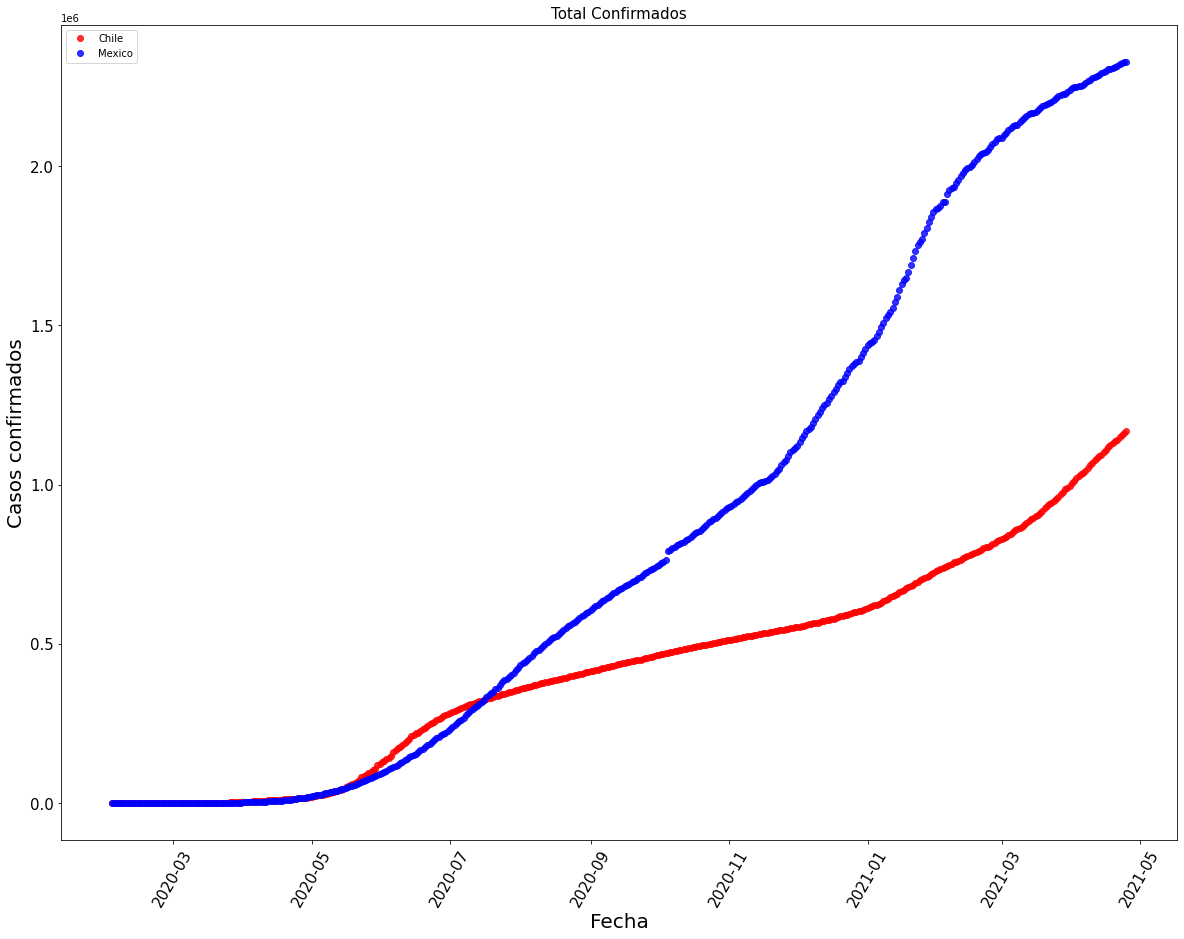

In [128]:
df1 = covid19_confirmados.groupby('Country/Region').sum().reset_index()

k = df1[df1['Country/Region']=='Chile'].loc[:,'2/3/20':]
chile_confirmados = k.values.tolist()[0]
k = df1[df1['Country/Region']=='Mexico'].loc[:,'2/3/20':]
mexico_confirmados = k.values.tolist()[0] 

dates = list(covid19_confirmados.columns[4:])
dates = list(pd.to_datetime(dates))
dates_chile = dates[8:]

plt.figure(figsize= (20,15))
plt.xticks(rotation = 60 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Fecha",fontsize = 20)
plt.ylabel('Casos confirmados',fontsize = 20)
plt.title("Total Confirmados" , fontsize = 15)

ax1 = plt.plot_date(y=chile_confirmados,x=dates_chile,label = 'Chile',color = 'r', alpha=0.8)
ax2 = plt.plot_date(y=mexico_confirmados,x=dates_chile,label = 'Mexico',color = 'b', alpha=0.8)
Analisis
plt.legend();

--------------Interfaz Gráfica-------------------

## Dashboard Interactivo en Voila

**Link:**